<!-- <img src="PNG_DOE_Logo.png" width="350" align="left"><br clear="all"> -->
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e2/Seal_of_the_United_States_Department_of_Energy.svg" style="width: 120px" align="left" embed=False><br clear="all">

<p> <font color=#146737 size=6><strong>EnPI Tool: Python Edition</strong></font></p>

<p> <font color=#146737 size=4><strong>Facility Level Tool</strong></font></p>

This program is a clone of the Visual Basic/Microsoft Excel version of the EnPI tool. It has some additional functionality that the original does not have. Please note that this is a personal version developed by Christopher Price who does not guarantee that it will not break or cause some frustration. Please send any comments about how to improve the program to pricecr@ornl.gov.

### Facility-Level Analysis:

This program has two modes: regression and energy intensity. 

In regression mode, the program will attempt to find a linesar regression model for the listed excel file. It will do this by testing each model year within the reporting range and returning a list of valid models and their properties. By default the program will choose the model with the best adjusted R$^2$ value. The user can override this defult by providing the index of the desired models. NOTE: If a model year outside of the reporting range is desired, specify optional arguments <i>Model_Range_Start</i> and <i>Model_Range_End</i> in the definitions below.

If no valid model is found or the energy intensity method is selected, the program will perform a traditional energy intensity analysis. 

Program assumes that first column of data is dates with label "<strong>Date</strong>", followed by <strong>energy sources</strong>, and then <strong>relevant variables</strong>.

### Program Inputs

Specify the path and file name for the excel file containing the facility data.

In [1]:
# Specify the path and file name for excel file containing facility data
folder_path = ''
file_name = 'Acme_Rochester.xlsx'
sheet_name = ''

Enter the columns in the excel file where the data is stored and the name of the header for production.

In [2]:
Data_Columns = 'A,C,E:G'
Production_Header = ''

Give the number of utilities and the number of relevant variables to be analyzed.

In [3]:
# Give the number of utilities and relevant variables
n_utilities = 2
n_relevant_variables = 2

Specify the date range for Better Plants reporting.

In [4]:
Reporting_Range_Start = '2007-01-01'
Reporting_Range_End = '2010-01-01'

Specify the date range for the regression anaylsis to test for valid models. If the range is the same as the reporting range, put '' for both dates.

In [5]:
Model_Range_Start = '2007-01-01'
Model_Range_End = '2008-01-01'

**** Choose the method for energy intensity analysis **** (Options are "Energy Intensity" or "Regression")

In [6]:
Method = "Regression"

If using regression, specify if you would like to display information for all valid models found. In this mode, the program will stop after finding the regression models.

In [7]:
Show_Models = False

Specify the index of the desired regression model for each energy resource. If '[]', the program will select the model with the highest adjusted R$^2$ value.

In [8]:
Chosen_Models = [1,3]

Specify if you would like the program to save results in a .json file. This file can be used with the corporate roll up feature later.

In [9]:
Save_Results = False

### Start of Facility Level Analysis

Load Python Edition of EnPI:

In [10]:
from PY_EnPI_Clone import EnPI_Load_Data, EnPI_PythonEdition

Information from above is used to load data into EnPI and check for issues:

In [11]:
Facility_Data = EnPI_Load_Data(folder_path + file_name, sheet_name, Data_Columns, n_utilities, n_relevant_variables)

### EnPI Results



Finding Regression Models...


	You have selected 2007-01-01 --> 2008-01-01 as the model year!

	Variables for Electricity (MMBTU) Model (index = 1) are: Production
	Variables for Natural gas (MMBTU) Model (index = 3) are: Production, Temperature

Checking Model Data Validity...

	Electricity (MMBTU) : PASS
	Natural gas (MMBTU) : PASS


Calculation EnPI Results... 
Regression Method is: Forecasting


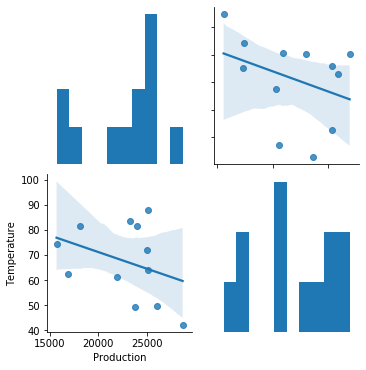

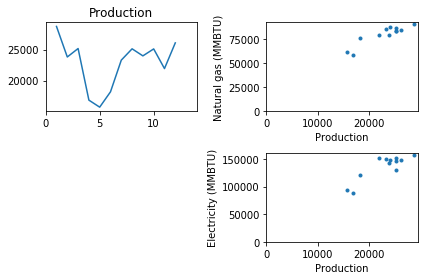

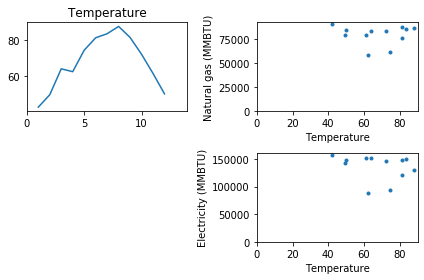

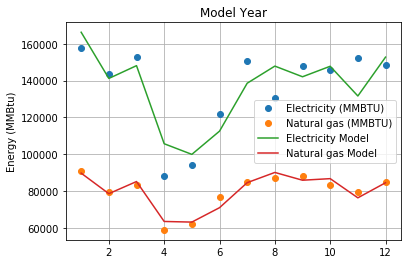

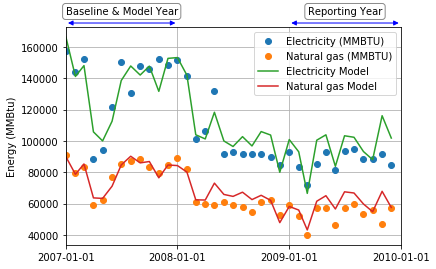

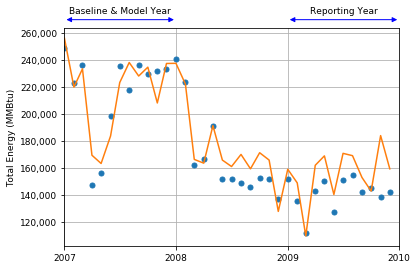

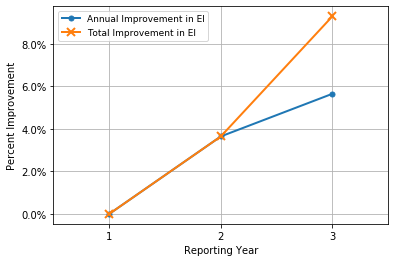

In [12]:
EnPI_Results = EnPI_PythonEdition(Facility_Data, n_utilities, n_relevant_variables, 
                                  Reporting_Range_Start, Reporting_Range_End, 
                                  Model_Range_Start, Model_Range_End, 
                                  Chosen_Models, Method, Show_Models,
                                  Production_Header)

In [13]:
display(EnPI_Results)

,1,2,3
Actual Electricity (MMBTU),"1,634,357.97","1,265,861.30","1,050,127.51"
Actual Natural gas (MMBTU),"960,346.20","758,810.60","643,298.80"
TOTAL ACTUAL ENERGY (MMBtu),"2,594,704.17","2,024,671.90","1,693,426.31"
Modeled Electricity (MMBTU),"1,634,357.97","1,304,164.03","1,153,191.34"
Modeled Natural gas (MMBTU),"960,346.20","797,194.00","714,012.50"
TOTAL MODELED ENERGY (MMBtu),"2,594,704.17","2,101,358.03","1,867,203.84"
Adjustment Method,Model Year,ForeCast,ForeCast
Electricity (MMBTU) Annual Savings,0,"38,302.72","103,063.83"
Natural gas (MMBTU) Annual Savings,0,"38,383.40","70,713.70"
New Energy Savings for Current Year (MMBtu/Year),0,"76,686.12","97,091.40"


### Save Results

In [14]:
if Save_Results == True:
    EnPI_Results.to_json(flnm[:-5] + '.json')